# TP2 : Débits et charges
**CIV6209A** : Conception de station d'épuration des eaux usées

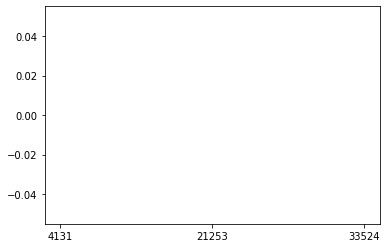

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

udebmin = pd.read_csv("donnees/DebitsSt-Hyac.csv", sep=';',  usecols=[3], skiprows=[0])
udebmoy = pd.read_csv("donnees/DebitsSt-Hyac.csv", sep=';',  usecols=[4], skiprows=[0])
udebmax = pd.read_csv("donnees/DebitsSt-Hyac.csv", sep=';',  usecols=[5], skiprows=[0])

udebmin = sorted(udebmin)
udebmoy = sorted(udebmoy)
udebmax = sorted(udebmax)

plt.plot(udebmin, np.arange(len(udebmin))/len(udebmin))
plt.plot(udebmoy, np.arange(len(udebmoy))/len(udebmoy))
plt.plot(udebmax, np.arange(len(udebmax))/len(udebmax))


In [25]:
import pandas as pd

v = ['Qpompé', 'Qmax', 'Qmin', 'DCO', 'DBO5C', 'MESval', 'MVESval', 'NTK', 'NH4', 'Pt', 'o-PO4', 'coli féc.']
N = [366, 298, 354, 366, 226, 366, 366, 51, 156, 365, 54, 25]
n = [0, 68, 12, 0, 140, 0, 0, 315, 210, 1, 312, 341]
mean = [248487, 363875, 6514, 246.17, 70.20, 134.49, 95.10, 17.772, 11.153, 2.0968, 0.8030, 2133616]
stdev = [89459, 118073, 3755, 71.24, 27.33, 45.81, 30.66, 5.154, 3.340, 0.6454, 0.2385, 1216899]
coefvar = [36.00, 32.45, 57.64, 28.94, 38.93, 34.06, 32.24, 29.00, 29.95, 30.78, 29.70, 57.03]
minimum = [152594, 208327, 96, 66.00, 8.00, 20.00, 15.00, 7.390, 1.930, 0.5500, 0.1700, 600000]
q1 = [191772, 268994, 4096, 201.00, 54.00, 106.15, 76.00, 14.800, 9.408, 1.7000, 0.6150, 1174980]
med = [217600, 323798, 5454, 245.50, 67.00, 130.00, 94.00, 18.100, 11.700, 2.1000, 0.8200, 1833333]
q3 = [266096, 435572, 7477, 289.00, 85.00, 160.00, 113.00, 20.800, 13.375, 2.5000, 0.8700, 3000000]
maximum = [563783, 655814, 21450, 472.00, 200.00, 350.00, 243.00, 32.100, 19.400, 4.0000, 1.2800, 6000000]
mode = ['*', '*', '*', 272, 66, 130, 90, (15.5, 17.5, 18.7, 19), 12.5, 2.5, 0.6, 3000000]
nmode = [0, 0, 0, 8, 9, 36, 16, 2, 6, 23, 4, 5]
skew = [1.71, 0.93, 1.79, 0.21, 0.99, 0.73, 0.52, 0.08, -0.43, -0.07, -0.31, 1.42]
kurt = [2.25, -0.24, 3.21, 0.33, 3.21, 1.66, 1.76, 0.44, 0.24, -0.05, -0.05, 2.89]
mssd = [1553740328, 5369877289, 3378991, 2037.49, 364.25, 1364.24, 543.61, '*', 3.545, 0.1276, 0.0544, '*']

df=pd.DataFrame({'Variable':v,'N':N, 'N*':n, 'Mean':mean, 'StDev':stdev, 'CoefVar':coefvar, 'Minimum':minimum, 'Q1':q1, 'Median':med, 'Q3':q3, 'Maximum':maximum, 'Mode':mode, 'N for Mode':nmode, 'Skewness':skew, 'Kurtosis':kurt, 'MSSD':mssd})
print(df)

     Variable    N   N*          Mean         StDev  CoefVar    Minimum  \
0      Qpompé  366    0  2.484870e+05  8.945900e+04    36.00  152594.00   
1        Qmax  298   68  3.638750e+05  1.180730e+05    32.45  208327.00   
2        Qmin  354   12  6.514000e+03  3.755000e+03    57.64      96.00   
3         DCO  366    0  2.461700e+02  7.124000e+01    28.94      66.00   
4       DBO5C  226  140  7.020000e+01  2.733000e+01    38.93       8.00   
5      MESval  366    0  1.344900e+02  4.581000e+01    34.06      20.00   
6     MVESval  366    0  9.510000e+01  3.066000e+01    32.24      15.00   
7         NTK   51  315  1.777200e+01  5.154000e+00    29.00       7.39   
8         NH4  156  210  1.115300e+01  3.340000e+00    29.95       1.93   
9          Pt  365    1  2.096800e+00  6.454000e-01    30.78       0.55   
10      o-PO4   54  312  8.030000e-01  2.385000e-01    29.70       0.17   
11  coli féc.   25  341  2.133616e+06  1.216899e+06    57.03  600000.00   

             Q1      Med

## Description du travail à faire
* Déterminer les débits (min, moy, max) et charges pour l'année actuelle de l'étude préliminaire (an 0 = 2030 pour Repentigny), dans 10 ans et dans 30 ans pour certaines conditions

Normalement, les "5" saisons sont associées aux débits min (hiver, été), moy(printemps) et max (fonte, automne). Dans le cadre du cours, un nombre minimal de débits devant être déterminés est fourni à titre indicatif au tableau 2.1.

## A) Débits
Les débits représentent des données de conception servant au dimensionnement des ouvrages et des équipements de traitement. Pour les principaux éléments de la filière liquide, une liste des débits requis servant à leur conception est fournie aux tableaux 2.1 et 2.2

### Tableau 2.1 : Débits à déterminer en fonction des éléments de la filière liquide à concevoir (Québec; liste non-exhaustive)
| Conception-ouvrages/équipements Filière liquide                                                                              | Débits requis                                                                                                                                                                                                                                                            |
|:------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Cas de référence pour tous les éléments                                                                                      | Q moy journalier sur une base annuelle                                                                                                                                                                                                                                   |
| Station de pompage des eaux brutes - Capacité minimale des pompes - Capacité maximale des pompes et dimensionnement du puits | - Q horaire minimal de buit - année 0 - Q horaire maximal - année 30                                                                                                                                                                                                     |
| Canaux                                                                                                                       | Capacité maximale de pompage installée                                                                                                                                                                                                                                   |
| Dimensionnement du bioréacteur (nombre et volume des bassins)                                                                | - Q moy journalier annuel – année 0 - Q nappe basse soutenu 14 jours – année 0   (température de l’eau dans les bassins à déterminer) - Q nappe haute soutenu 14 jours – année 0   (température de l’eau dans les bassins à déterminer)Q moy journalier annuel – année 0 |
| Dimensionnement du système d'aération du bioréacteur                                                                         | Q moy soutenu 14 jours en période estivale (année 0) avec des températures maximales de l’eau dans les bassins et de l’air à l’extérieur                                                                                                                                 |
|                                                                                                                              |                                                                                                                                                                                                                                                                          |
| Vérification de la conception                                                                                                | Débits requis                                                                                                                                                                                                                                                            |
| Dimensionnement du bioréacteur(nombre et volume des bassins)                                                                 | - Q moy journalier annuel – année 10 - Q nappe basse soutenu 14 jours – année 10 - Q nappe haute soutenu 14 jours – année 10                                                                                                                                             |
| Dimensionnement du système d’aération du bioréacteur                                                                         | - Q moy soutenu 14 jours en période estivale (année 10) avec des températures maximales de l’eau dans les bassins et de l’air à l’extérieur                                                                                                                              |
</center>

## A1) 
À partir du chapitre 2 du Cahier des exigences environnementales de la StaRRE, présenter les débits pour chaque période décrite (ex. Qmin, Qmoy, Qmax pour ans 0, 10, 30 pour nappe basse, nappe haute et dégel-orage : 27 valeurs)

## A2)
À partir d'une année récente de données journalières (si possible), déterminer les valeurs de débit suivantes :
- Débits indiqués (année 0) au tableau 2.1

Poser les hypothèses requises, notamment pour les facteurs de pointe pour les périodes de temps sec suivantes :
- en nappe basse (milieu de l'hiver, sécheresse estivale)
- en fonte (3 sem. après fonte des neiges en temps sec; captage élevé) ou temps d'orage (24 h après la pluie pour éviter les débordements en temps sec). Noter que la StaRRE ne reçoit pas toutes les eaux de fonte ou d'orage, une partie de celles-ci étant débordées au cours d'eau récepteur.
- en nappe haute (3 à 6 semaines après la fonte, mais avant 30 avril [pour le sud du Québec]; automne)

## A3)
À partir de données de population, d'occupation du territoire (superficie occupée et %résidentiel, %institutionnel, %commercial, etc.), et les valeurs unitaires types québécoises, déterminer sur une base théorique :
- Q domestique (résidentiel, institutionnel et commercial - RIC)
- Q industriel
- Q eaux parasites (infiltration et captage)
- Q pluie et déterminer les débits sous les formes indiquées au Tableau 2.1 (colonne de droite; c.f. Brière, 2012)

## A4)
Comparer les valeurs déterminées en A1, A2 et A3. Recommander, au besoin,
des travaux de réhabilitation de réseaux ou de réduction de débit.

## A5)
Pour une conception détaillée :
- Déterminer les débits à l’année 10 qui serviront aux vérifications de la
conception

Compléter avec les débits présentés au Tableau 2.6. Ceux-ci complètent les débits indiqués au Tableau 2.1